#**Task 2 - IRIS FLOWER CLASSIFICATION**#


Importing the Dependencies

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('/content/Iris.csv')

In [15]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data = data.drop(columns = ['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
#Data preprocessing
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

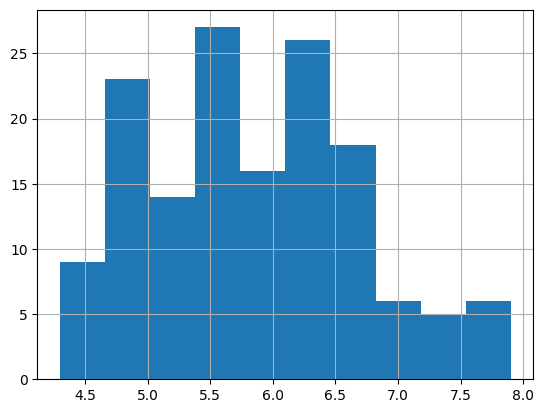

In [21]:
# Exploratory Data Analysis
data['SepalLengthCm'].hist()

<Axes: >

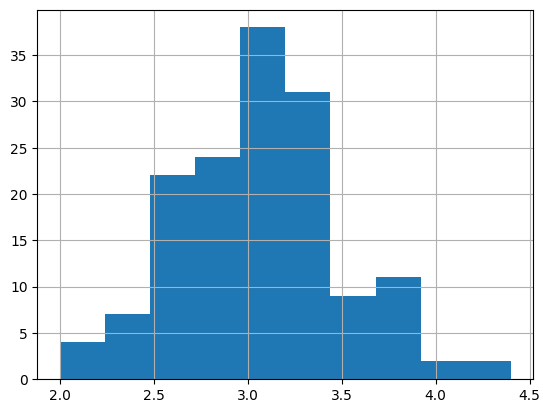

In [22]:
data['SepalWidthCm'].hist()

<Axes: >

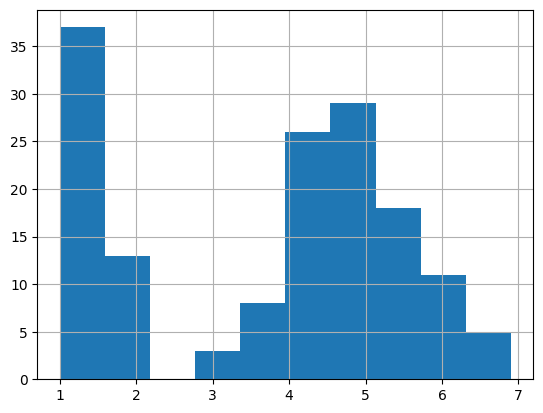

In [23]:
data['PetalLengthCm'].hist()

<Axes: >

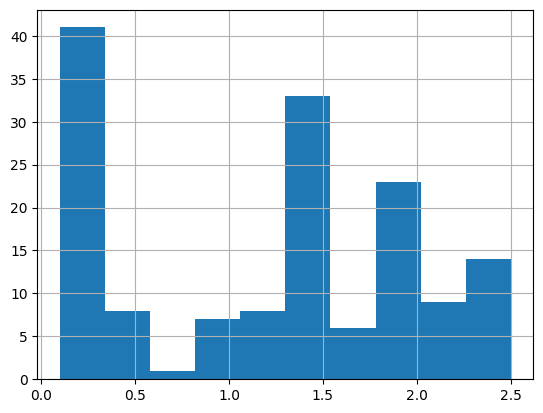

In [24]:
data['PetalWidthCm'].hist()

In [25]:
# Scatterplot
colors =['red','orange','black']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

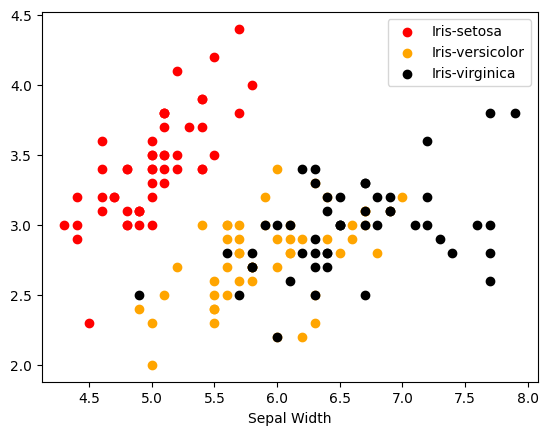

In [26]:
for i in range(3):
  x= data[data['Species']== species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i],label=species[i])
  plt.xlabel('Sepal Length')
  plt.xlabel('Sepal Width')
  plt.legend()

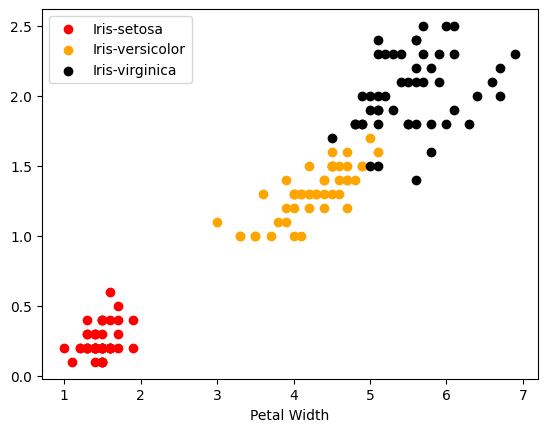

In [27]:
for i in range(3):
  x= data[data['Species']== species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
  plt.xlabel('Petal Length')
  plt.xlabel('Petal Width')
  plt.legend()


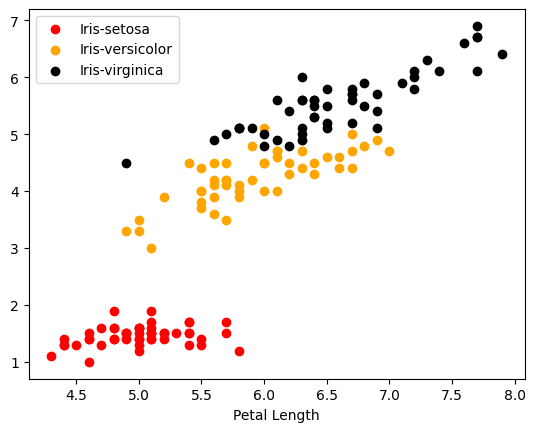

In [30]:
for i in range(3):
  x= data[data['Species']== species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i],label=species[i])
  plt.xlabel('Sepal Length')
  plt.xlabel('Petal Length')
  plt.legend()

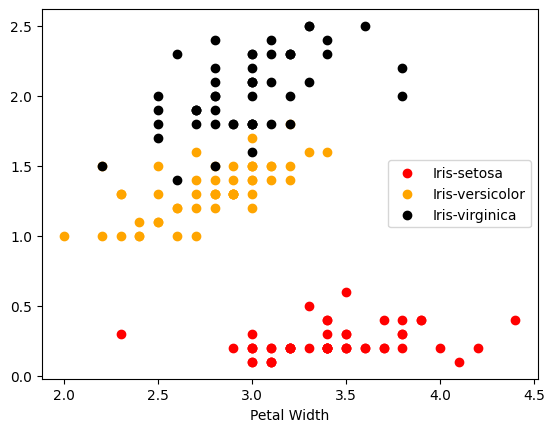

In [31]:
for i in range(3):
  x= data[data['Species']== species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
  plt.xlabel('Sepal Width')
  plt.xlabel('Petal Width')
  plt.legend()

In [32]:
# Correlation Matrix 'Showing correlation coefficient btw variable in form of table'
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

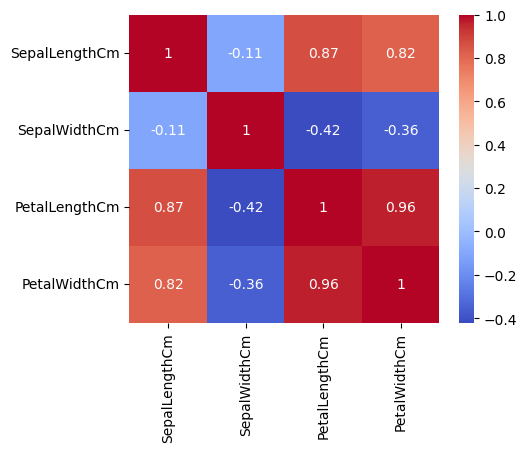

In [33]:
corr = data.corr()
fig , ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [34]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
data['Species'] = le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
# Model Training
from sklearn.model_selection import train_test_split
x=data.drop(columns=['Species'], axis=1)
y=data['Species']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.38, random_state=2529)

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

In [52]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [53]:
# print metric to get performance
print('Accuracy: ',model.score(X_test,y_test)*100)

Accuracy:  29.82456140350877


In [ ]:
# knn